#### L2T15 

Use this Notebook to create an in-depth EDA on the Titanic dataset provided in this task. Your EDA should contain descriptions of your EDA and appropriate visualisations.

Use the following guiding questions for your EDA:

- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- “Women and children first”. Was this the case?
- Add one other observation that you have noted in the dataset.

First, import in the data from the csv. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

plt.style.use("ggplot")

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since the overall premise of the EDA is based around factors influencing survival, we can begin by seeing the relationship between 'Survived' vs. other relevant columns, such as: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked. 

The 'Survived' column is a categorical variable, with 2 binary values: 1 = survived, or 0 = did not survive. Represent side by side. 

#### Part 1: Survival by Gender

Survived  Sex   
0         female    0.090909
          male      0.525253
1         female    0.261504
          male      0.122334
Name: PassengerId, dtype: float64
891
The overall passenger survival rate of 38.38383838383838%


<Axes: title={'center': 'GRAPH 1: Survival of Passengers by Gender'}, xlabel='Survived', ylabel='Number of Passengers'>

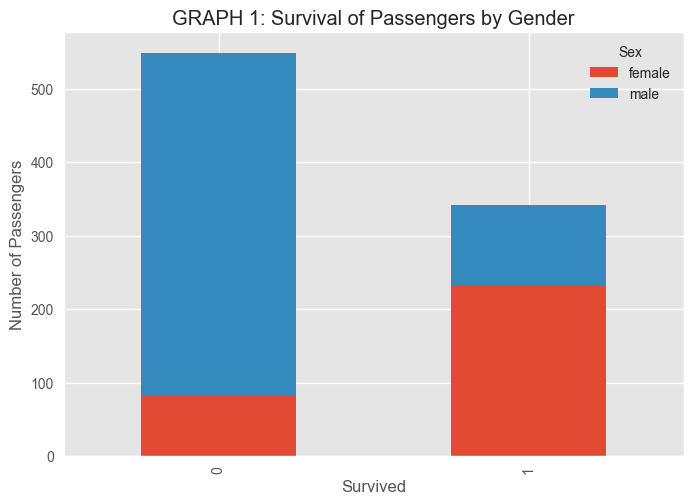

In [74]:
# group the data by Survived and Sex, and count the number of passengers in each group
survivors_by_gender = df.groupby(['Survived', 'Sex'])['PassengerId'].count()
print(survivors_by_gender/len(df['Survived']))
print(len(df['Survived']))

survival_rate = len(df[(df.Survived==1)])/len(df['Survived'])
print(f'The overall passenger survival rate of {survival_rate * 100}%')

# create a bar chart of the results
survivors_by_gender.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 1: Survival of Passengers by Gender')


In [ ]:
female_survivors = df[(df.Sex == 'female') & (df.Survived == 1)]
print(len(female_survivors)/len(df[(df.Sex == 'female')]))

#### Finding 1: Most of the survivors were female, while most of the non-survivors were male. This is despite more passengers being male vs. female. 

#### Part 2: Survival by Age

Let's now see the age variations of the survivors vs. non-survivors, by gender. 

<Axes: title={'center': 'GRAPH 2: Survivor by Average Age, by Gender'}, xlabel='Survived', ylabel='Average Age of Passengers'>

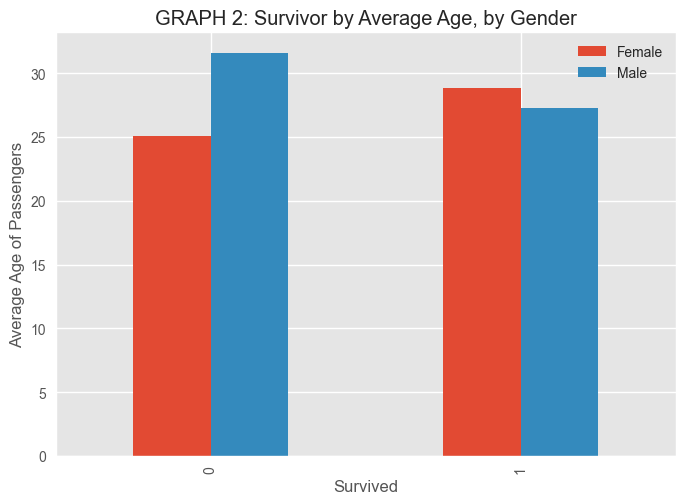

In [75]:
female1_age = df[ (df.Sex == "female") & (df.Survived == 1) ].loc[:, "Age"]
male1_age = df[ (df.Sex == "male") & (df.Survived == 1) ].loc[:, "Age"]
female0_age = df[ (df.Sex == "female") & (df.Survived == 0) ].loc[:, "Age"]
male0_age = df[ (df.Sex == "male") & (df.Survived == 0) ].loc[:, "Age"]


mean_ages_df = pd.DataFrame({
                'Female': [female0_age.mean(), female1_age.mean()],
                'Male': [male0_age.mean(), male1_age.mean()]
})
mean_ages_df.plot(kind = 'bar', xlabel = 'Survived', ylabel = 'Average Age of Passengers', title = 'GRAPH 2: Survivor by Average Age, by Gender')

Text(0, 0.5, 'Frequency')

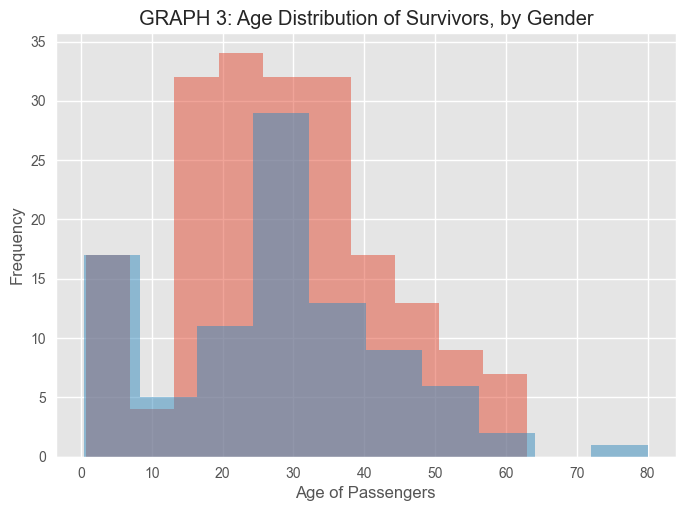

In [76]:
# Just looking at the averages doesn't show us much, so let's look deeper into the distributions 
plt.hist(female1_age, alpha=0.5)
plt.hist(male1_age, alpha=0.5)
plt.title('GRAPH 3: Age Distribution of Survivors, by Gender')
plt.xlabel('Age of Passengers')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

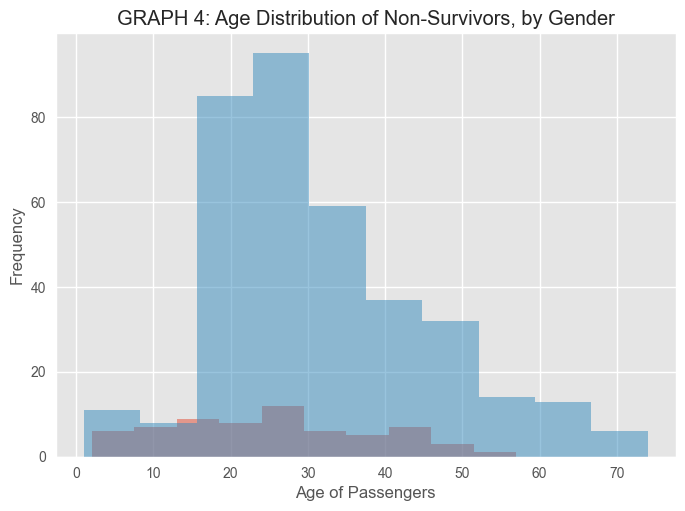

In [77]:
plt.close()
plt.hist(female0_age, alpha=0.5)
plt.hist(male0_age, alpha=0.5)
plt.title('GRAPH 4: Age Distribution of Non-Survivors, by Gender')
plt.xlabel('Age of Passengers')
plt.ylabel('Frequency')

We can note a few things - here:

1) Children regardless of gender were more likely to be saved / survive. This can be seen by the histogram of survivors ages. This effect does not show on the female mean age, as the mean age of survivors were still higher than non-survivors. This is likely due to the finding that most survivors are female anyways, hence the % of female children is not that significant vs. total number of women. The converse is apparent for male survivors ages. 

2) Of the number of non-child survivor males, there is a still a group of adult men who have survived. It is worth doing an exploration later about whether or not this relates to class, any more or less than female survivors. 


Let's look into point 1 first, and see how the surviorship varies for children (age 10 or below, and can be approximately identified by the histogram) compares with non-children, and also for male vs. female children. 

The survival rate for children / someone who is age 10 or below is 59.375%
This is much higher compared to an overall passenger survival rate of 38.38383838383838%
Survived  Sex   
0         female    12
          male      14
1         female    19
          male      19
Name: PassengerId, dtype: int64


<Axes: title={'center': 'GRAPH 5: Survival of Child Passengers (Age 10 & below) by Gender'}, xlabel='Survived', ylabel='Number of Passengers'>

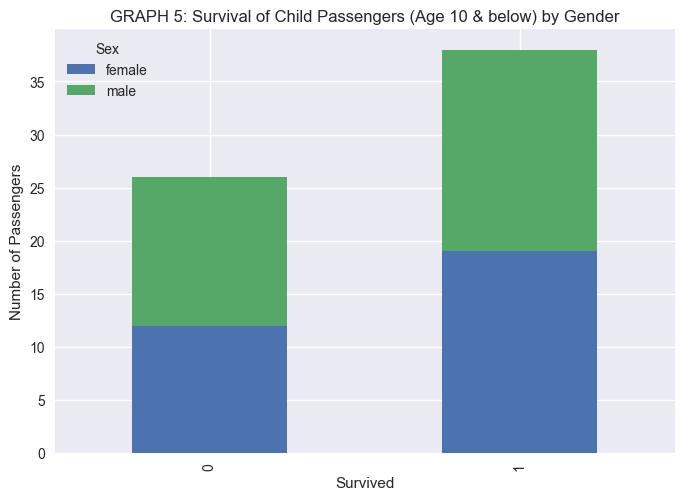

In [84]:
children = df[(df.Age <= 10)]
survivors_children = children[(children.Survived == 1)]
girls = children[(children.Sex == 'female')]
boys = children[(children.Sex == 'male')]

child_survival_rate = len(survivors_children)/len(children)

print(f'The survival rate for children / someone who is age 10 or below is {child_survival_rate * 100}%')
print(f'This is much higher compared to an overall passenger survival rate of {survival_rate * 100}%')

survivors_by_gender_children = children.groupby(['Survived', 'Sex'])['PassengerId'].count()
print(survivors_by_gender_children)
survivors_by_gender_children.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 5: Survival of Child Passengers (Age 10 & below) by Gender')


#### Finding 2: The survival rates are much higher for children. 

#### Finding 3: Within the child age category, survival did not vary significantly based on the gender of the child

#### Part 3: Survival by Class

<Axes: title={'center': 'GRAPH 6: Survival of Passengers by Class'}, xlabel='Pclass', ylabel='Number of Passengers'>

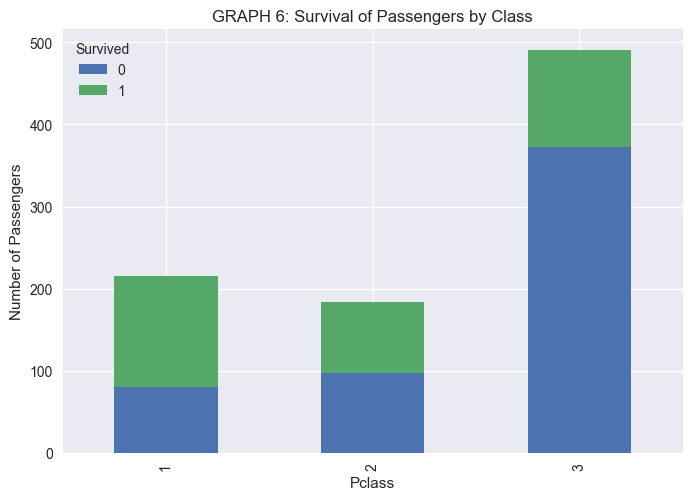

In [80]:
# group the data by class and survival status, count the number of passengers
survivors_by_class = df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

plt.style.use("seaborn-v0_8")

# unstack the data and create a stacked bar chart
survivors_by_class.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 6: Survival of Passengers by Class')


From the above, we can see that while most passengers were in Pclass 3 (the lowest class) - the lower class by far had the lowest survival rates. 

Pclass 1 also had higher survival rates than Pclass 2, so there is indeed a class divide / tiering. 

However, the drop in survival rates between Pclass 2 and Pclass is particulary extreme, whereas the drop between Pclass 1 and 2 is much smoother and subtle. 

We now proceed to investigate how these vary with gender:

Pclass  Survived
1       0            77
        1            45
2       0            91
        1            17
3       0           300
        1            47
Name: PassengerId, dtype: int64


<Axes: title={'center': 'GRAPH 7: Survival of Male Passengers by Class'}, xlabel='Pclass', ylabel='Number of Passengers'>

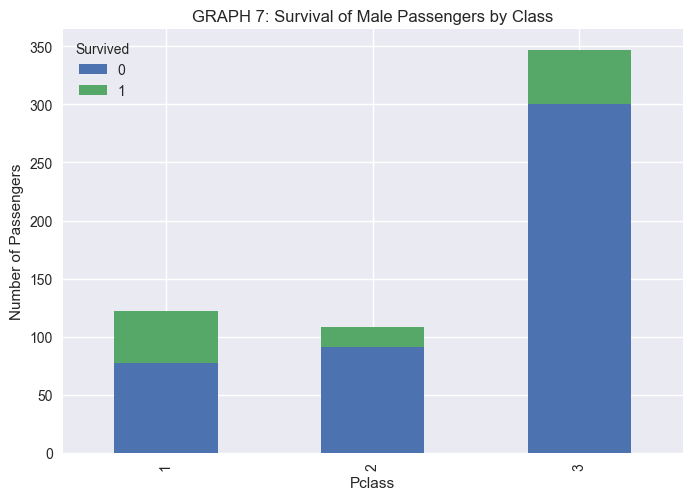

In [81]:
male_df = df[df.Sex == 'male']
# group the data by class and survival status, count the number of passengers
survivors_by_class = male_df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

print(survivors_by_class)

# unstack the data and create a stacked bar chart
survivors_by_class.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 7: Survival of Male Passengers by Class')

<Axes: title={'center': 'GRAPH 8: Survival of Female Passengers by Class'}, xlabel='Pclass', ylabel='Number of Passengers'>

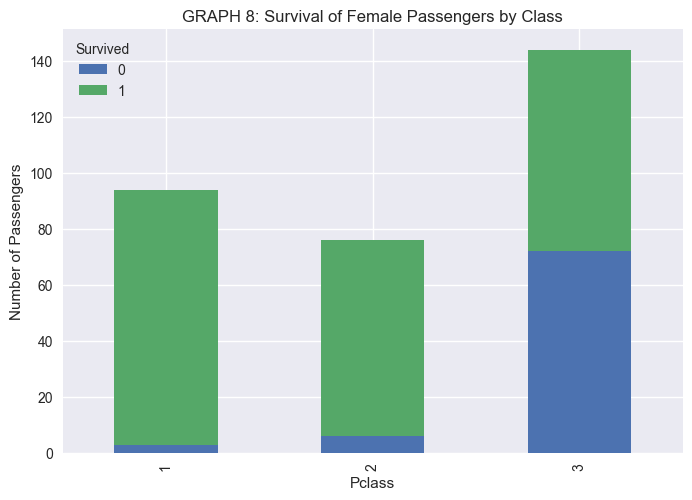

In [82]:
female_df = df[df.Sex == 'female']
# group the data by class and survival status, count the number of passengers
survivors_by_class = female_df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

# unstack the data and create a stacked bar chart
survivors_by_class.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 8: Survival of Female Passengers by Class')

The two graphs above showing gender splits between survival rates between different classes, is particularly revealing and different. 

We can see that, across all classes - the survival rate for female passengers were much higher compared to men. 
- This is so extreme that almost all of the female passengers of the upper classes Pclass 1 and 2 have survived. 
- The survival rate of the lowest class Pclass 3 for a female passenger was around 50% - this is still significantly higher than the overall survival rate of 38.4%. 

Male passengers across all classes had much lower survival rates in comparison. 

Even in the highest Pclass 1 for men, had a survival rate of 45/(45+77) = 36.9%, which is still lower than both the overall survival rate and also lower than the survial rate of a Pclass 3 female passenger.

#### Finding 4: The survival rates are higher for higher classes of passengers, and vice versa.

#### Finding 5: The survival rates within each class do differ based on gender - with female psssengers having a significantly higher survival rate across all classes vs. male passengers

Now let's investigate survival rates across classes for children. From the below, the survival rates look roughly comparable to the survival rates of female passengers across different classes. 

<Axes: title={'center': 'GRAPH 9: Survival of Child Passengers'}, xlabel='Pclass', ylabel='Number of Passengers'>

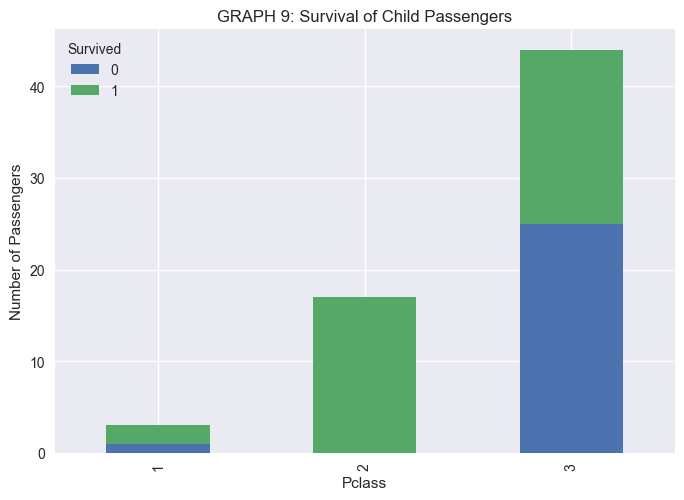

In [83]:
# group the data by class and survival status, count the number of passengers
survivors_by_class_children = children.groupby(['Pclass', 'Survived'])['PassengerId'].count()

# unstack the data and create a stacked bar chart
survivors_by_class_children.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 9: Survival of Child Passengers')

#### Conclusion

To answer the following questions:

1) What is the most important factor in determining survival of the Titanic incident?
- There are 3 key factors we explored: age, class, gender. 
- Finding 5 (Graph 6, 7, 8) showed that female passengers had a higher survival rate across all class groups vs. male passengers - where even the lowest class female passengers had a higher survival rate than Pclass 1 male passengers. This suggests gender more importance in determining survival than class. 
- Graph 5 shows that the approximate male vs. female child survivors are equal - aka. unlike the class factor, female child passengers were not the overwhelming portion of survived child passengers.

2) In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- Yes this does, as per Finding 4 and Graph 6 - we can see that passengers in PClass 3 (the lowest class) had the significantly lower survival rates vs. the upper class passengers. 

3) “Women and children first”. Was this the case?
- Yes this was the case. 
- For children, we refer to Finding 2 and 3, and Graph 5 - where we have shown that the survival rates are much higher for children (59.4% survival rate vs. the overall average survival rate of 38.4%), and that there was no significant difference in survival rates between male or female children. In Graph 3 also we can see a spike in the distribution of young survivors below age 10.  
- For women, we refer to Finding 1 and Graph 1 where we can see female passengers have a much greater rate of survival compared to men. This is further strengthened by Graph 8, where we can see that across all classes, female passengers overwhelmingly had a higher rate survival than male passengers. 

4) Add one other observation that you have noted in the dataset.
- From the below Graph 10, we can observe that it would appear being a traveller with at least 1 spouse / sibling travelling (some form of family member) does improve your survival rates compared to being a lone traveller. 
- This does make sense, considering travelling with family means there is more support and help.

<Axes: title={'center': 'GRAPH 10: Survival of Passengers by Family'}, xlabel='SibSp', ylabel='Number of Passengers'>

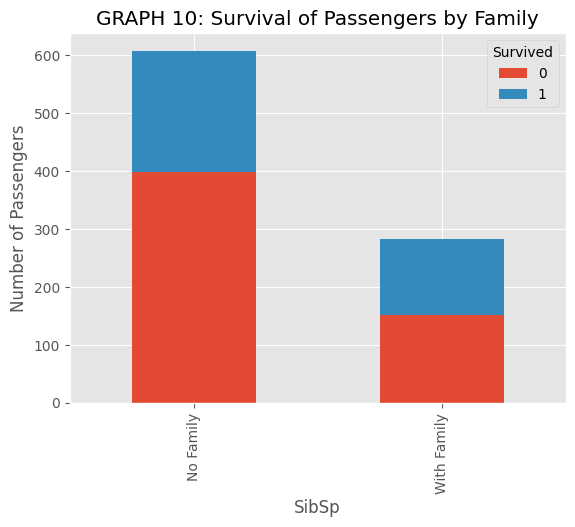

In [16]:
# Additional research point - we will look into fares 
df_copy = df

df_copy['SibSp'] = df_copy['SibSp'].replace(0,'No Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(1,'With Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(2,'With Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(3,'With Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(4,'With Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(5,'With Family')
df_copy['SibSp'] = df_copy['SibSp'].replace(8,'With Family')

survivors_family = df_copy.groupby(['SibSp', 'Survived'])['PassengerId'].count()

# create a bar chart of the results
survivors_family.unstack().plot(kind='bar', stacked=True, ylabel = 'Number of Passengers', title = 'GRAPH 10: Survival of Passengers by Family')